<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None
      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9
TV       0
Sales    0
dtype: int64
[18.36093117  7.10164519 16.30408016 10.57461258 13.62970956  9.14456718
 11.16891716  7.90024197 10.24495925  8.39704345 11.53571451 15.78870666
 18.20306902 15.65405953 12.45502941 10.56532657 18.2912861  18.21699803
 12.66396461 14.65117055 19.77704755 10.55604056 14.81367571 19.40096418
 17.07017591 10.21710123 20.26920603 17.13517797 16.14157501 17.17696502
  7.68202075 11.23391922 10.28210329 13.15612309  8.84277189 14.75795966
  7.937386   11.51249949  7.3198664  13.53220646]
mean_squared_error =  11.138435884617795
mean_absolute_error =  2.628910494637606
r2

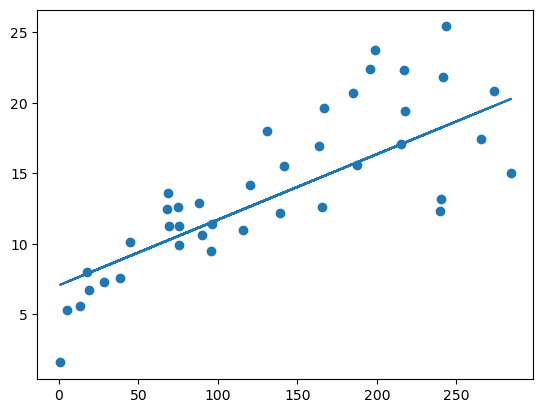

[20.07419984]


In [1]:
# Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_csv('tvmarketing.csv')
print(data.info())
print(data.head())
print(data.isna().sum())

x = data['TV']
y = data['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(y_pred)

print("mean_squared_error = ",mean_squared_error(y_test, y_pred))
print("mean_absolute_error = ",mean_absolute_error(y_test, y_pred))
print("r2_score = ",r2_score(y_test, y_pred))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)
plt.show()

user_x = np.array([[280.1]]).reshape(-1,1)
user_pred = model.predict(user_x)
print(user_pred)

In [2]:
# Multi Linear Regressiom

data = pd.read_csv('Real estate.csv')

data = data.drop(data.columns[0], axis=1)

data.isna().sum()

data

x = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

[42.81872956 47.41150592 54.51279289 34.03360504 30.68563725 37.44049755
 16.76334765 40.63323966 44.85314432 45.48676796 47.23469203 47.46221787
 34.39109912 31.46958466 22.38039355 33.86750034 34.9594327  15.34933945
 28.59880657 43.56755684 28.43532778 24.86220338 16.79055561 24.05228208
 41.98462942 39.73352837 45.40491052 48.67203158 35.4661373  44.55748467
 48.10265602 33.58221787 47.07898963  6.83758543 48.10265602 45.97364409
 32.96247303 47.82450412 27.42937501 37.28628348 16.3539728  43.36765654
 43.95667078 41.33753023 31.24729371 41.80812473 47.46221787 36.59817386
  9.03250212 13.02436292 51.87489538 36.57007232 32.63603996 46.94323871
 35.79779608 43.97529574 47.43283403 28.20452259 51.55090238 36.58924392
 31.68219491 47.59563525 38.56614997 29.96573905 13.67426491 48.25903338
 42.13726395 53.78419073 33.80204993 13.6434336  46.52546211 42.35631828
 54.73011708 38.66833762 40.03464049 35.41874736 47.5249457  27.96381375
 42.63410682 41.33730227 34.40395693 44.28168641 32

[1 1 2 2 2 0 2 1 2 1 0 2 1 1 1 1 0 2 2 1 0 0 1 1 2 1 0 1 2 2]
Accuracy =  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30

[0]


/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


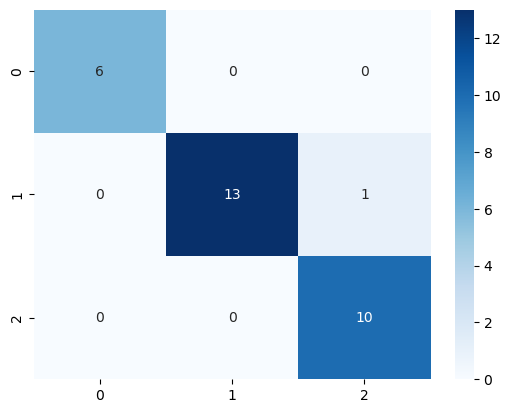

In [3]:
# Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('Iris Dataset.csv')

x = data.iloc[:,:-1]
y = data.iloc[:,-1]

labelencoder= LabelEncoder()
y = labelencoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

print("Accuracy = ",accuracy_score(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, cmap = 'Blues')

print(classification_report(y_test, y_pred))

user_x = np.array([[5.8,2.9,1.0,0.1]])
user_pred = model.predict(user_x)
print(user_pred)

+447935454150 lovely girl talk to me xxx﻿ I always end up coming back to this song<br />﻿ my sister just received over 6,500 new <a rel="nofollow" class="ot-hashtag" href="https://plus.google.com/s/%23active">#active</a> youtube views Right now. The only thing she used was pimpmyviews. com﻿ Cool﻿ Hello I&#39;am from Palastine﻿ Wow this video almost has a billion views! Didn&#39;t know it was so popular ﻿ Go check out my rapping video called Four Wheels please ❤️﻿ Almost 1 billion﻿ Aslamu Lykum... From Pakistan﻿ Eminem is idol for very people in España and Mexico or Latinoamerica﻿ Help me get 50 subs please ﻿ i love song :)﻿ Alright ladies, if you like this song, then check out John Rage.  He&#39;s a smoking hot rapper coming into the game.  He&#39;s not better than Eminem lyrically, but he&#39;s hotter. Hear some of his songs on my channel.﻿ The perfect example of abuse from husbands and the thing is I&#39;m a feminist so I definitely agree with this song and well...if I see this someo

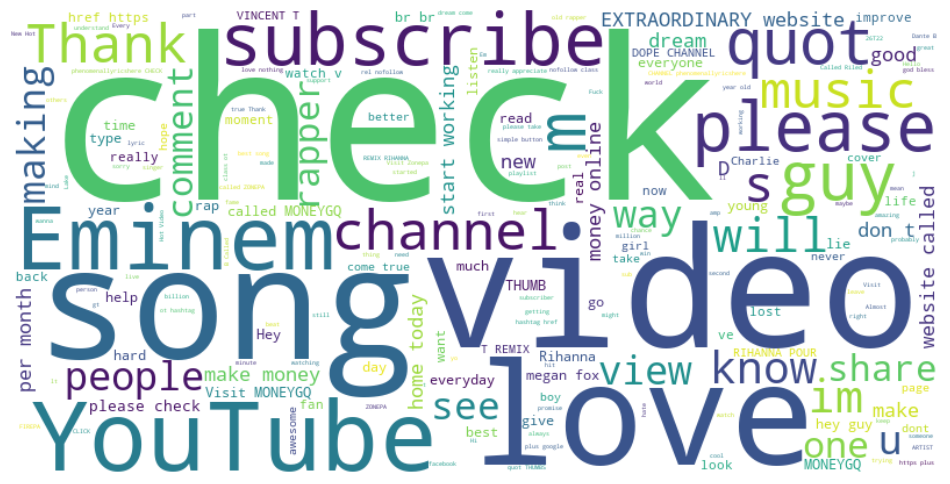

In [10]:
# Word Cloud
from wordcloud import WordCloud

data = pd.read_csv('wordcloud.csv')
data

text = " ".join(content for content in data.CONTENT)
print(text)

wc = WordCloud(height= 400, width=800, background_color = 'white').generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
# SPAM Filtering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
data = pd.read_csv('spamfilter.csv')
data['Category'] = data['Category'].map({'ham':0,'spam':1})
data

x_train, x_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size = 0.2)

vect = CountVectorizer()
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

model = MultinomialNB()
model.fit(x_train_vect, y_train)
y_pred = model.predict(x_test_vect)

print(y_pred)
print("Accuracy = ",accuracy_score(y_test, y_pred))

user_input = ["As a valued customer, I am pleased to inform you that on checking your Mob no. you have won $1200 bonus prize, please call on 123456788"]

user_input_v = vect.transform(user_input)
output = model.predict(user_input_v)

if (output[0] == 1):
    print("SPAM")
else:
    print("HAM")




[0 0 0 ... 0 0 0]
Accuracy =  0.9847533632286996
SPAM


In [44]:
# Sentiment Analysis
data = pd.read_csv('sentianalysis.csv')
data['sentiment'] = data['sentiment'].map({'positive':0, 'negative':1})

x_train, x_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size = 0.2)

vect = CountVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy = ",accuracy_score(y_test, y_pred))

user = ["I'm disappointed with the service here"]
user = vect.transform(user)
output = model.predict(user)
if (output[0] == 1):
    print("Negative")
else:
    print("Positive")

Accuracy =  0.815
Negative
